# 0. Introdução

A análise abaixo foi feita utilizando dados disponibilizados no site www.kaggle.com

Nossa motivação é realizar análises voltadas para o entendimento e comparação das pessoas que figuram entre os mais ricos do mundo segundo a Forbes.

Análises que tentaremos fazer com este estudo:

- Qual a distribuição de idade dos bilionários e identificar a idade média, a idade mínima e a idade máxima?
- Analisar a relação entre o patrimônio final e a categoria do bilionário, buscando identificar se há alguma categoria que possui uma média de patrimônio mais alta.
- Verificar a proporção de homens e mulheres presentes no dataset e analisar se há alguma diferença significativa entre a quantidade de homens e mulheres bilionários.
- Identificar os países com maior número de bilionários e analisar a distribuição de patrimônio desses bilionários por país.
- Identificar as categorias de negócios mais lucrativas e suas respectivas personalidades mais ricas.

Fonte do dataset: https://www.kaggle.com/datasets/shrikrishnaparab/forbes-billionaires-and-companies-2022

# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Importando os dados

In [2]:
df = pd.read_csv('forbes_billionaires_2022.csv')

In [3]:
df.head()

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,bio,about
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Texas,Austin,Tesla,True,M,6/28/1971,CEO,1.0,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Washington,Seattle,Amazon,True,M,1/12/1964,Entrepreneur,1.0,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,NaN,Paris,LVMH Moët Hennessy Louis Vuitton,False,M,3/5/1949,Chairman and CEO,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Washington,Medina,Bill & Melinda Gates Foundation,True,M,10/28/1955,Cofounder,4.0,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,Berkshire Hathaway,True,M,8/30/1930,CEO,5.0,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2668 non-null   int64  
 1   personName         2668 non-null   object 
 2   age                2582 non-null   float64
 3   finalWorth         2668 non-null   int64  
 4   category           2668 non-null   object 
 5   source             2668 non-null   object 
 6   country            2655 non-null   object 
 7   state              748 non-null    object 
 8   city               2624 non-null   object 
 9   organization       352 non-null    object 
 10  selfMade           2668 non-null   bool   
 11  gender             2652 non-null   object 
 12  birthDate          2569 non-null   object 
 13  title              401 non-null    object 
 14  philanthropyScore  396 non-null    float64
 15  bio                2668 non-null   object 
 16  about              1562 

In [4]:
# Verificando valores nulos
print(df.isna().sum()) 

rank                    0
personName              0
age                    86
finalWorth              0
category                0
source                  0
country                13
state                1920
city                   44
organization         2316
selfMade                0
gender                 16
birthDate              99
title                2267
philanthropyScore    2272
bio                     0
about                1106
dtype: int64


Das variáveis que usaremos na análise, a 'idade' preeecherei com a media das demais, para não comprometer o resultado e 'país e 'gênero', como são poucas linhas, optei por remove-las.

In [11]:
df['age'] = df['age'].fillna(df['age'].mean()) 
df = df.dropna(subset=['country', 'gender'])  

In [13]:
#Verificando as alterações feitas
print(df.isna().sum()) 

rank                    0
personName              0
age                     0
finalWorth              0
category                0
source                  0
country                 0
state                1895
city                   29
organization         2289
selfMade                0
gender                  0
birthDate              83
title                2240
philanthropyScore    2245
bio                     0
about                1092
dtype: int64


# 3. Analisando os dados

# 3.1 Qual a distribuição de idade dos bilionários, a idade média, a idade mínima e a idade máxima?

<AxesSubplot:>

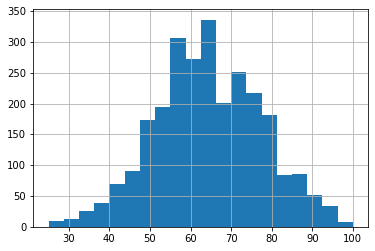

In [15]:
df['age'].hist(bins=20)

Podemos observar que a maioria dos bilionários se encontram na faixa de 55 - 65 anos de idade

In [17]:
# Calculando a idade média, idade mínima e idade máxima dos bilionários
idade_media = df['age'].mean()
idade_minima = df['age'].min()
idade_maxima = df['age'].max()

print(f'Idade média dos bilionários: {idade_media:.2f}')
print(f'Idade mínima dos bilionários: {idade_minima:.2f}')
print(f'Idade máxima dos bilionários: {idade_maxima:.2f}')

Idade média dos bilionários: 64.24
Idade mínima dos bilionários: 25.00
Idade máxima dos bilionários: 100.00


In [24]:
# A nível de curiosidade vamos ver quem é o mais novo e o mais velho da lista

linha_menor_idade = df.nsmallest(1,'age')
linha_menor_idade

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,bio,about
1975,1929,Pedro Franceschi,25.0,1500,Finance & Investments,fintech,United States,California,Los Angeles,Brex,True,M,7/19/1996,Cofounder,NaN,"Pedro Franceschi is co-CEO of Brex, a fintech ...",NaN


O mais jovem na lista dos bilionários é Pedro Franceschi, Co-fundador da empresa Brex.

In [26]:
linha_maior_idade = df.nlargest(1,'age')
linha_maior_idade

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,bio,about
1681,1645,George Joseph,100.0,1800,Finance & Investments,insurance,United States,California,Los Angeles,NaN,True,M,9/11/1921,NaN,NaN,George Joseph is the founder of Mercury Genera...,Joseph named the company after the Roman god M...


O mais velho da lista é George Joseph, funddor da empresa Mercury General Corporation

# 3.2 Identificando as categorias de negócios mais lucrativas e suas personalidades mais ricas.

In [28]:
# Agrupando os bilionários por categoria e calculando a média de patrimônio final
media_patrimonio = df.groupby('category')['finalWorth'].mean()

# Ordenando as categorias pela média de patrimônio final em ordem decrescente
media_patrimonio = media_patrimonio.sort_values(ascending=False)

print(media_patrimonio)

category
Automotive                    8451.470588
Technology                    6399.117647
Fashion & Retail              6380.658436
Metals & Mining               5745.588235
Telecom                       5597.297297
Logistics                     5276.470588
Diversified                   5222.346369
Media & Entertainment         5078.350515
Gambling & Casinos            4678.260870
Food & Beverage               4606.750000
Finance & Investments         4401.808786
Energy                        4182.105263
Sports                        3651.851852
Real Estate                   3577.083333
Service                       3549.056604
Healthcare                    3289.861751
Manufacturing                 3266.366366
Construction & Engineering    2693.478261
Name: finalWorth, dtype: float64


Notamos que não coincidentemente, a categoria com a maior média de patrimonio é a categoria em que atua o lider da lista Elon Musk.

In [46]:
categoria_mais_lucrativa = media_patrimonio.index[0]
personalidades = df[df['category'] == categoria_mais_lucrativa]

personalidades = personalidades.sort_values(by = 'finalWorth', ascending = False)

print('Personalidades mais ricas na categoria mais lucrativa:')
print(personalidades[['personName', 'finalWorth']].head())

Personalidades mais ricas na categoria mais lucrativa:
         personName  finalWorth
0         Elon Musk      219000
28       Robin Zeng       44800
55  Susanne Klatten       24300
61         Li Shufu       23700
76    Stefan Quandt       20700


# 3.3 Verificando a proporção de homens e mulheres presentes no dataset e analisar se há alguma diferença significativa entre a quantidade de homens e mulheres bilionários.

In [30]:
# Agrupando os bilionários por gênero e contando o número de bilionários em cada gênero
contagem_genero = df.groupby('gender')['personName'].count()

# Calculando a média de patrimônio final para homens e mulheres
media_patrimonio_homem = df.loc[df['gender'] == 'M']['finalWorth'].mean()
media_patrimonio_mulher = df.loc[df['gender'] == 'F']['finalWorth'].mean()

print('Quantidade de bilionários por gênero:')
print(contagem_genero)
print()
print('Média de patrimônio final para homens:', media_patrimonio_homem)
print('Média de patrimônio final para mulheres:', media_patrimonio_mulher)

Quantidade de bilionários por gênero:
gender
F     307
M    2332
Name: personName, dtype: int64

Média de patrimônio final para homens: 4758.597770154374
Média de patrimônio final para mulheres: 4681.4332247557


Notamos que a quantidade de homens na lista é consideravelmente maior que a das mulheres, também tendo a média maior.

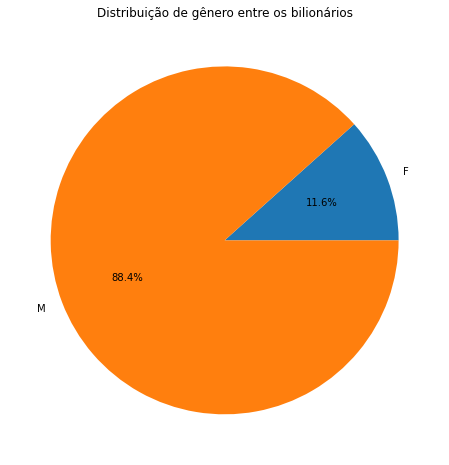

In [33]:
# Vamos ver essa comparação em um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_genero.values, labels=contagem_genero.index, autopct='%1.1f%%')
plt.title('Distribuição de gênero entre os bilionários')
plt.show()

# 3.4 Identificando os países com maior número de bilionários e analisar a distribuição de patrimônio desses bilionários por país.

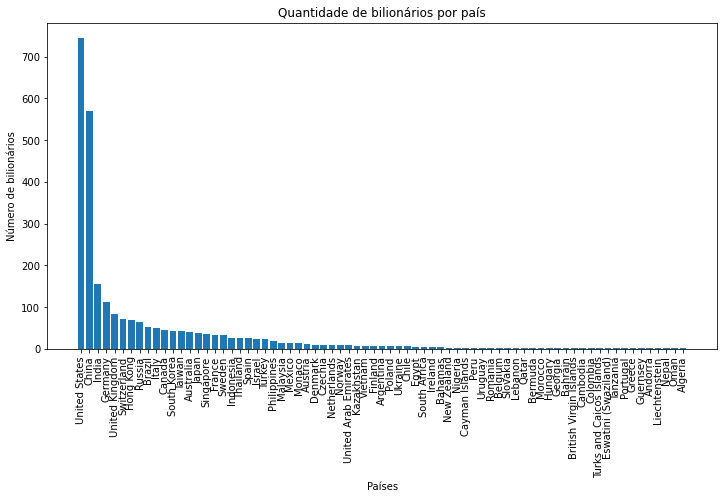

In [34]:
# Agrupando os bilionários por país e contando o número de bilionários em cada país
contagem_pais = df.groupby('country')['personName'].count()

# Ordenando os países pela quantidade de bilionários em ordem decrescente
contagem_pais = contagem_pais.sort_values(ascending=False)

# Visualizando as informações em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(contagem_pais.index, contagem_pais.values)
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.ylabel('Número de bilionários')
plt.title('Quantidade de bilionários por país')
plt.show()

Percebemos que o país com o maior número de bilionários são os Estados Unidos, seguido pela China. Estando ambos bem a frente dos demais países.

In [42]:
# A nivel de curiosidade, vamos ver quantos bilionários brasileiros estão na lista
contagem_br = df.loc[df['country'] == 'Brazil'].shape[0]
print('Quantidade de brasileros na lista:', contagem_br)

Quantidade de brasileros na lista: 53


# Considerações sobre a análise

Esta análise foi realizada como parte de um estudo e teve como objetivo explorar o arquivo .csv encontrado no site do kaggle. Embora os resultados obtidos sejam úteis, reconheço que este é um estudo simples e que há espaço para melhorias no futuro. 
Em particular, seria interessante explorar outras variáveis e técnicas de análise mais avançadas para obter uma compreensão mais profunda dos dados. Além disso, no futuro, pretendo aprofundar esta análise com técnicas mais avançadas, como análises de séries temporais, análise de regressão e aprendizado de máquina. Acredito que essas técnicas adicionais ajudarão a obter insights mais significativos sobre os dados e aprimorar a precisão da análise.